In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math 


## Task1

In [31]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        #pdb.set_trace()
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self
    
    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

mss: 191.1657405426685


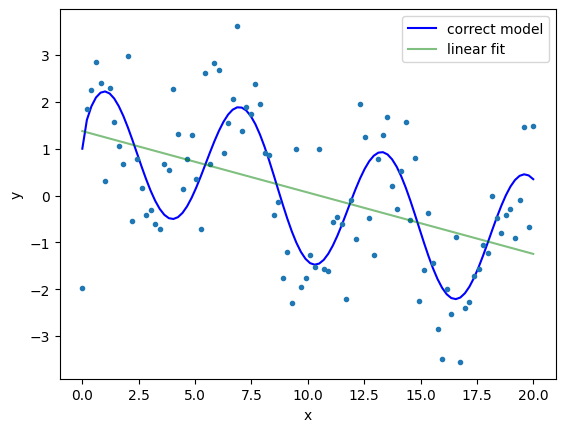

In [32]:
# Generating data
N = 100
x_range = np.linspace(0,20, N)
y_true = np.sin(np.sqrt(x_range)) + np.cos(x_range) + np.sin(x_range)
plt.plot(x_range, y_true, 'b-', label='correct model')                       
y = y_true + np.random.normal(0, 1, 100)              
plt.plot(x_range, y, '.')      


# create model
model = LinearRegression()
y_predict = model.fit(x_range,y).predict(x_range)


mss = (y_predict - y)**2
print(f'mss: {sum(mss)}')
# plot the graph
plt.plot(x_range, y_predict, 'g-', alpha=.5, label='linear fit')
plt.xlabel('x')
plt.ylabel(r'y')
plt.legend()
plt.show()

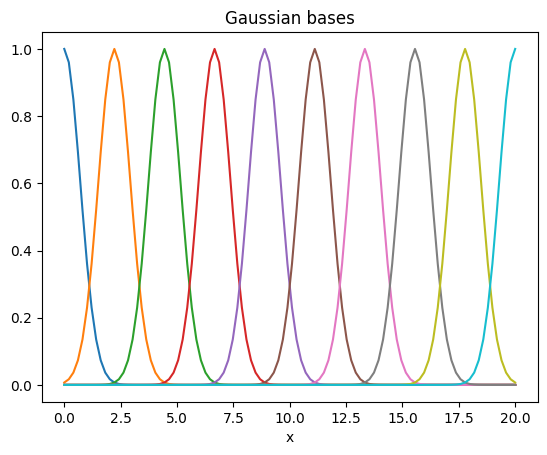

In [33]:
D=10
gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)          #non-linear feature function
mu = np.linspace(0,20,D)                                          #different mean values for the non-linear features
phi = gaussian(x_range[:,None], mu[None,:],1)                           #gives a new set of features of the existing data
for d in range(D):
    plt.plot(x_range, phi[:,d], '-')
plt.xlabel('x')
plt.title('Gaussian bases')
plt.show()

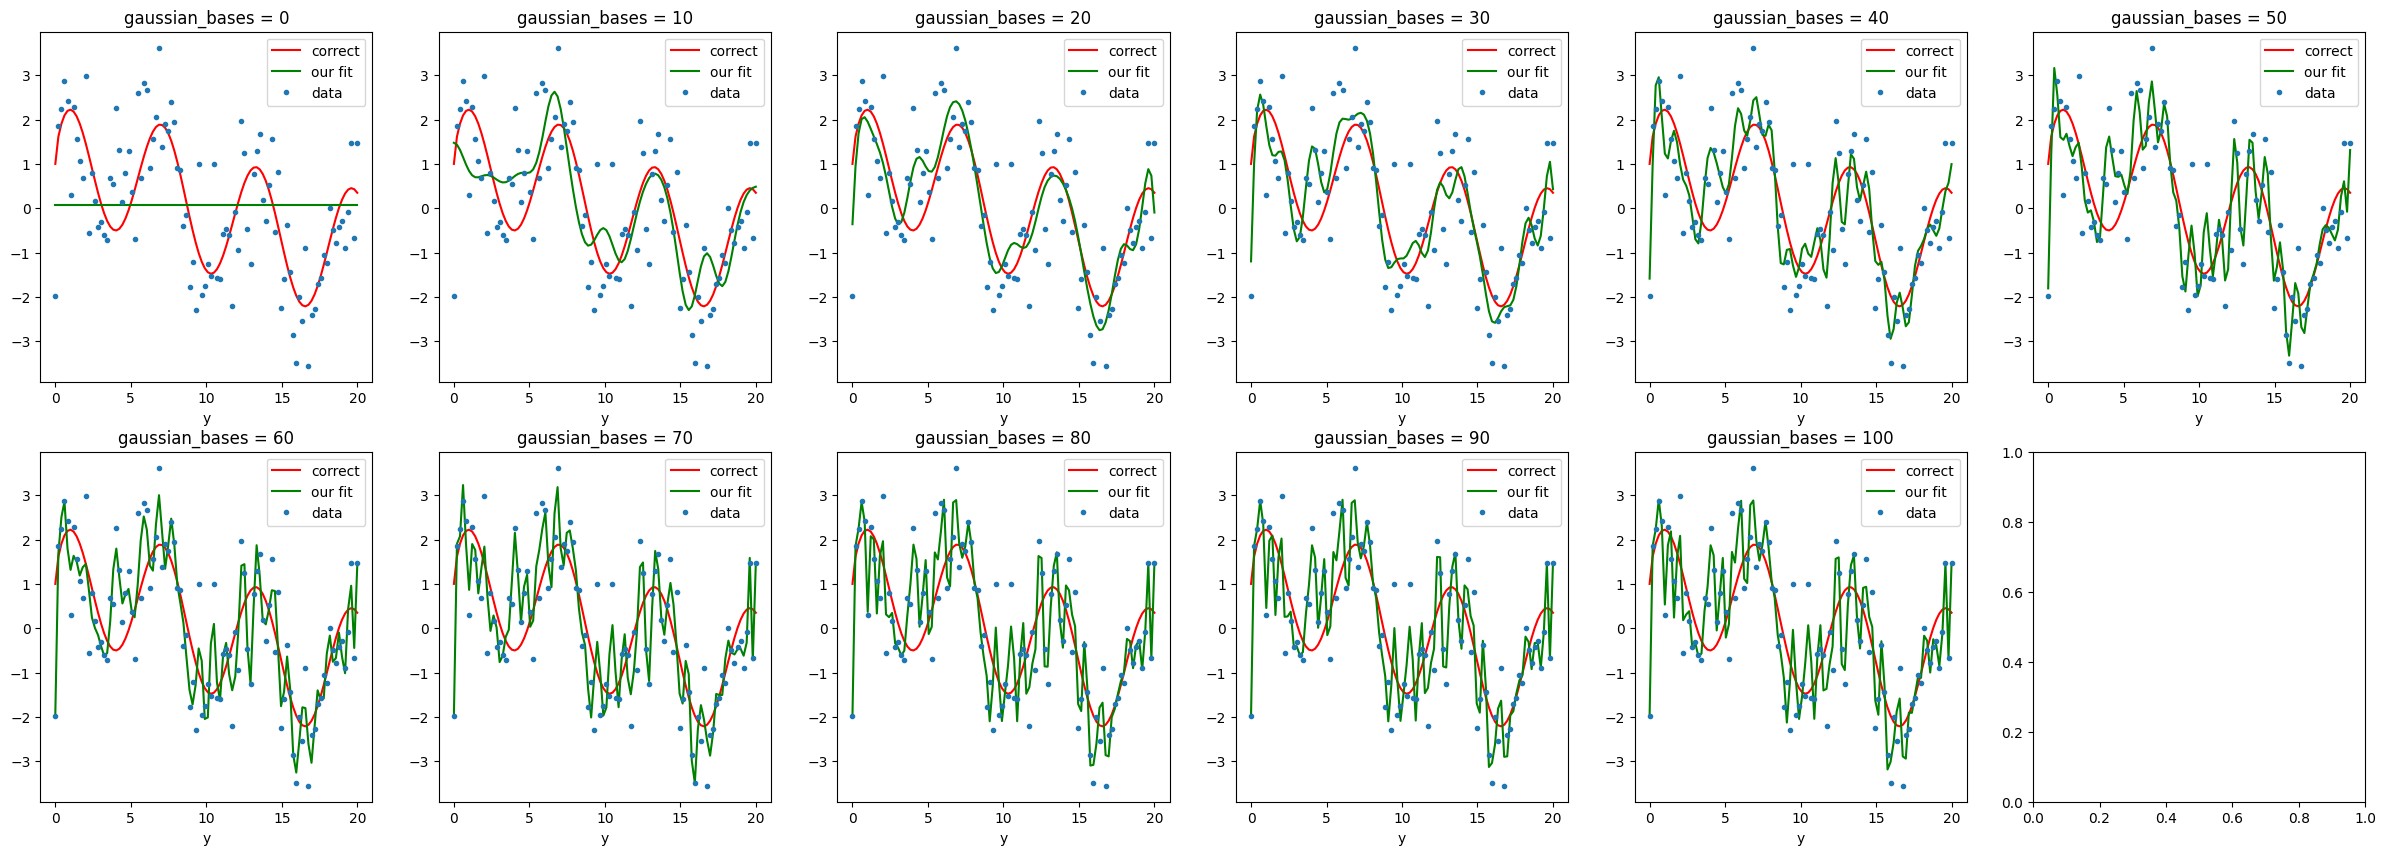

In [34]:
fig, ax = plt.subplots(2,6,figsize=(30,10))


gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)         

ax = ax.flatten()
num_gaussian_bases = [0,10,20,30,40,50,60,70,80,90,100]
for i in range(11):
    gaussian_bases = num_gaussian_bases[i]
    mu = np.linspace(0,20,gaussian_bases) 
    phi = gaussian(x_range[:,None], mu[None,:],1)
    yh = model.fit(phi,y).predict(phi)
    ax[i].plot(x_range, y_true, 'r-', label='correct')      
    ax[i].plot(x_range, yh, 'g-', label='our fit')
    ax[i].plot(x_range, y, '.', label='data')
    ax[i].set_xlabel('x')
    ax[i].set_xlabel('y')
    ax[i].set_title(f'gaussian_bases = {gaussian_bases}')
    ax[i].legend()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 80 and the array at index 1 has size 100

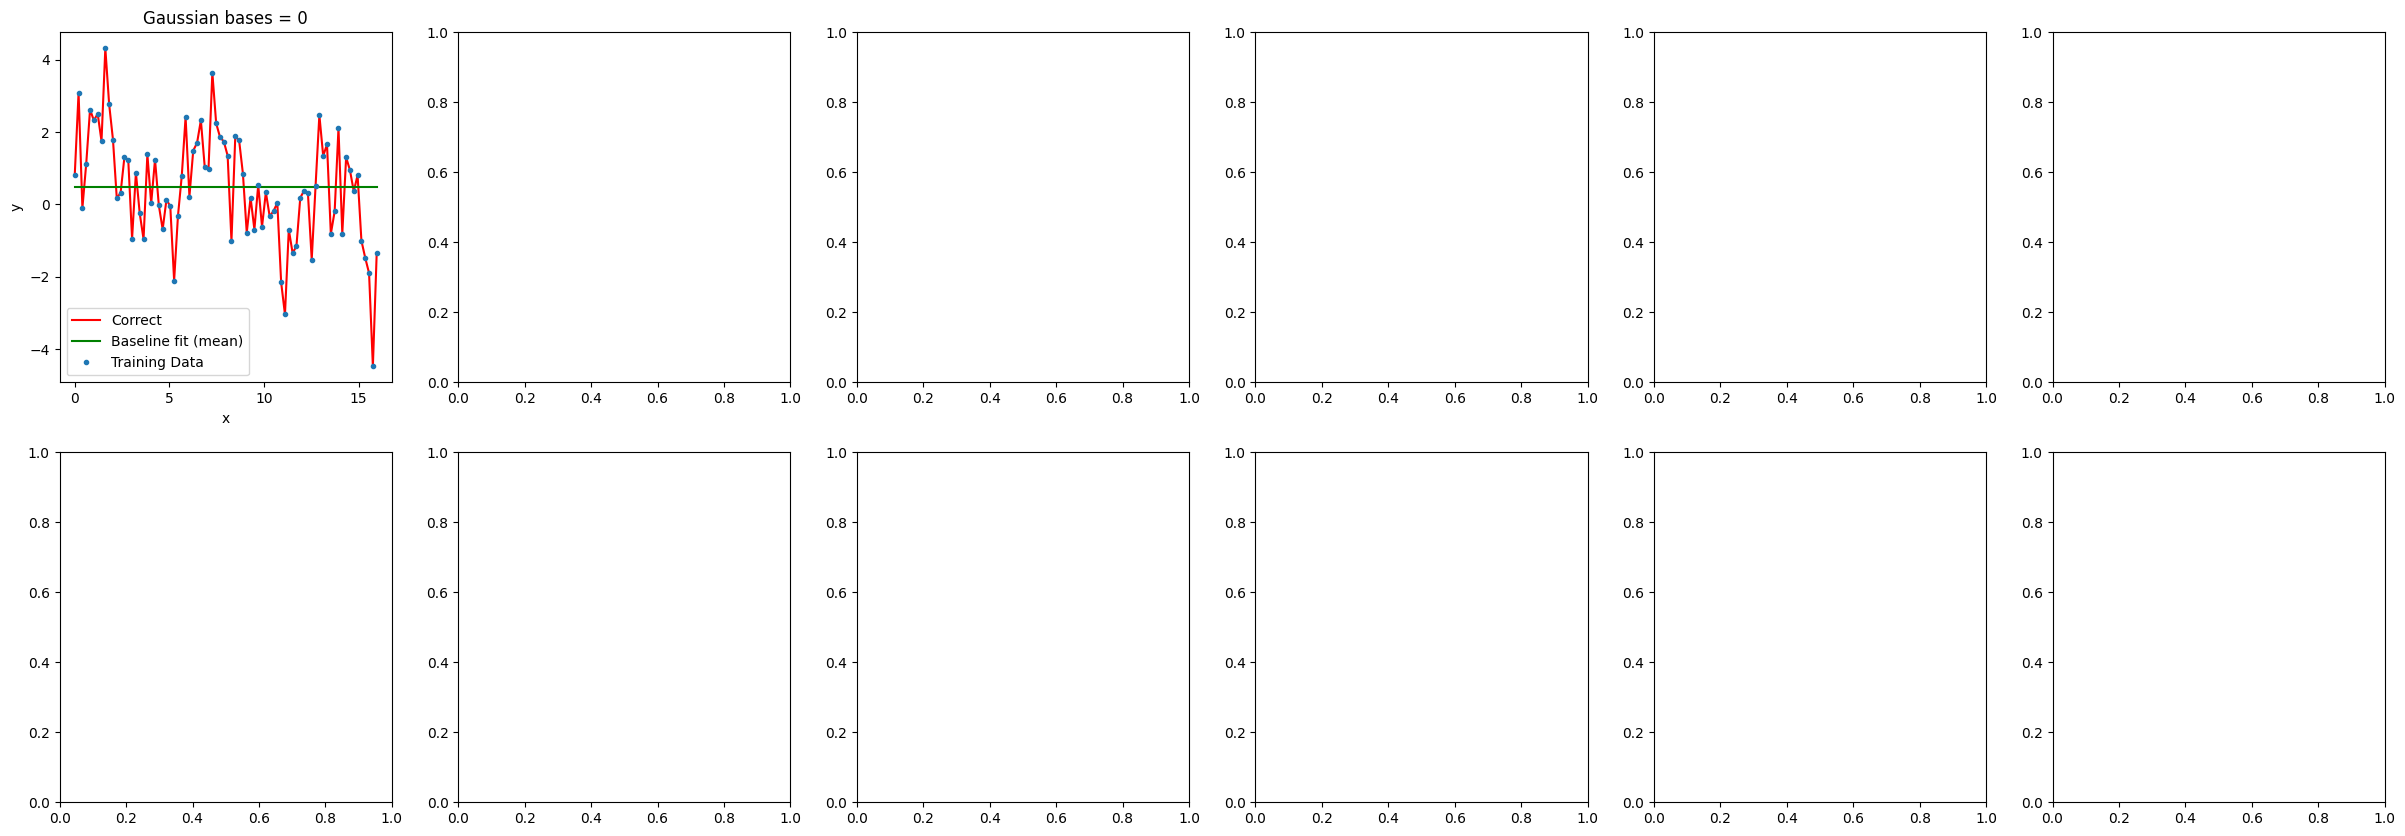

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Linear Regression class
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(N)])
        self.w = np.linalg.lstsq(x, y, rcond=None)[0]
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        return x @ self.w

# Generate synthetic data
N = 100
x_range = np.linspace(0, 20, N)
y_true = np.sin(np.sqrt(x_range)) + np.cos(x_range) + np.sin(x_range)
y = y_true + np.random.normal(0, 1, N)  # Add noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x_range, y, test_size=0.2, shuffle=False)

# Define Gaussian basis function
gaussian = lambda x, mu, sigma: np.exp(-((x - mu) / sigma)**2)

# Initialize the linear regression model
model = LinearRegression()

# Set up for multiple plots
fig, ax = plt.subplots(2, 6, figsize=(30, 10))
ax = ax.flatten()

# List of different numbers of Gaussian bases
num_gaussian_bases = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Streamlined loop
for i, gaussian_bases in enumerate(num_gaussian_bases):
    
    if gaussian_bases > 0:
        # Generate Gaussian features
        mu = np.linspace(np.min(X_train), np.max(X_train), gaussian_bases)
        phi_train = gaussian(X_train[:, None], mu[None, :], 1)
        
        # Fit the model and predict
        yh_train = model.fit(phi_train, y_train).predict(phi_train)
    else:
        # Baseline fit is just a constant value (mean of y_train) without any Gaussian features
        yh_train = np.full_like(X_train, np.mean(y_train))
    
    # Plot training results
    ax[i].plot(X_train, y_train, 'r-', label='Correct')      
    ax[i].plot(X_train, yh_train, 'g-', label='Our fit' if gaussian_bases > 0 else 'Baseline fit (mean)')
    ax[i].plot(X_train, y_train, '.', label='Training Data')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].set_title(f'Gaussian bases = {gaussian_bases}')
    ax[i].legend()

plt.tight_layout()
plt.show()
